# Mini Project - Job Salaries Dataset

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
from scipy import stats
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.model_selection import train_test_split

# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
# for plotting confusion matrix
from sklearn.metrics import confusion_matrix
from collections import Counter
import collections

#### Loading of dataset

In [2]:
dsdata = pd.read_csv('ds_salaries.csv')
dsdata.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)
dsdata.head()

,Index,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


## Data Cleaning and Transformation

In [3]:
salary = pd.DataFrame(dsdata['salary_in_usd'])

In [4]:
salary["salary_in_usd"].max()

600000

<Axes: >

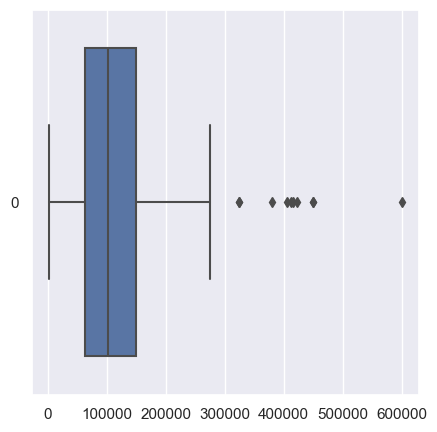

In [5]:
fig = plt.figure(figsize=(5,5))
sb.boxplot(data=salary["salary_in_usd"], orient='h')

In [6]:
salary.describe()

,salary_in_usd
count,607.000000
mean,112297.869852
std,70957.259411
min,2859.000000
25%,62726.000000
50%,101570.000000
75%,150000.000000
max,600000.000000


In [7]:
salary

,salary_in_usd
0,79833
1,260000
2,109024
3,20000
4,150000
...,...
602,154000
603,126000
604,129000
605,150000


### Creating feature: Fliter the salary by creating different categories to group them
- 5 different categories created 
    1. Low ( )
    2. Low-Mid ( )
    3. Mid ( )
    4. Mid-High ( )
    5. High ( )

In [8]:
salary_filtered = salary[(np.abs(stats.zscore(salary)) < 3).all(axis=1)]
salary_filtered.describe()

,salary_in_usd
count,598.000000
mean,107531.449833
std,59174.545525
min,2859.000000
25%,62649.500000
50%,100000.000000
75%,149565.250000
max,324000.000000


In [9]:
labels = ["low", "low-mid", "mid", "mid-high", "high"]
labels

['low', 'low-mid', 'mid', 'mid-high', 'high']

In [10]:
salary_filtered["salary_group"] = pd.cut(salary_filtered.salary_in_usd, range(2500, 356150, 64300), right=False, labels=labels)
salary_filtered

C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1388088196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_filtered["salary_group"] = pd.cut(salary_filtered.salary_in_usd, range(2500, 356150, 64300), right=False, labels=labels)


,salary_in_usd,salary_group
0,79833,low-mid
1,260000,high
2,109024,low-mid
3,20000,low
4,150000,mid
...,...,...
602,154000,mid
603,126000,low-mid
604,129000,low-mid
605,150000,mid


In [11]:
salary_outliers = salary[(np.abs(stats.zscore(salary)) >= 3).all(axis=1)]
salary_outliers["salary_group"] = "outlier"
salary_outliers

C:\Users\acer\AppData\Local\Temp\ipykernel_7428\2423084383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_outliers["salary_group"] = "outlier"


,salary_in_usd,salary_group
25,325000,outlier
33,450000,outlier
63,412000,outlier
97,450000,outlier
157,423000,outlier
225,416000,outlier
252,600000,outlier
519,380000,outlier
523,405000,outlier


In [12]:
new_salary = pd.concat([salary_filtered,salary_outliers])
new_salary = new_salary.sort_index(ascending=True)
new_salary

,salary_in_usd,salary_group
0,79833,low-mid
1,260000,high
2,109024,low-mid
3,20000,low
4,150000,mid
...,...,...
602,154000,mid
603,126000,low-mid
604,129000,low-mid
605,150000,mid


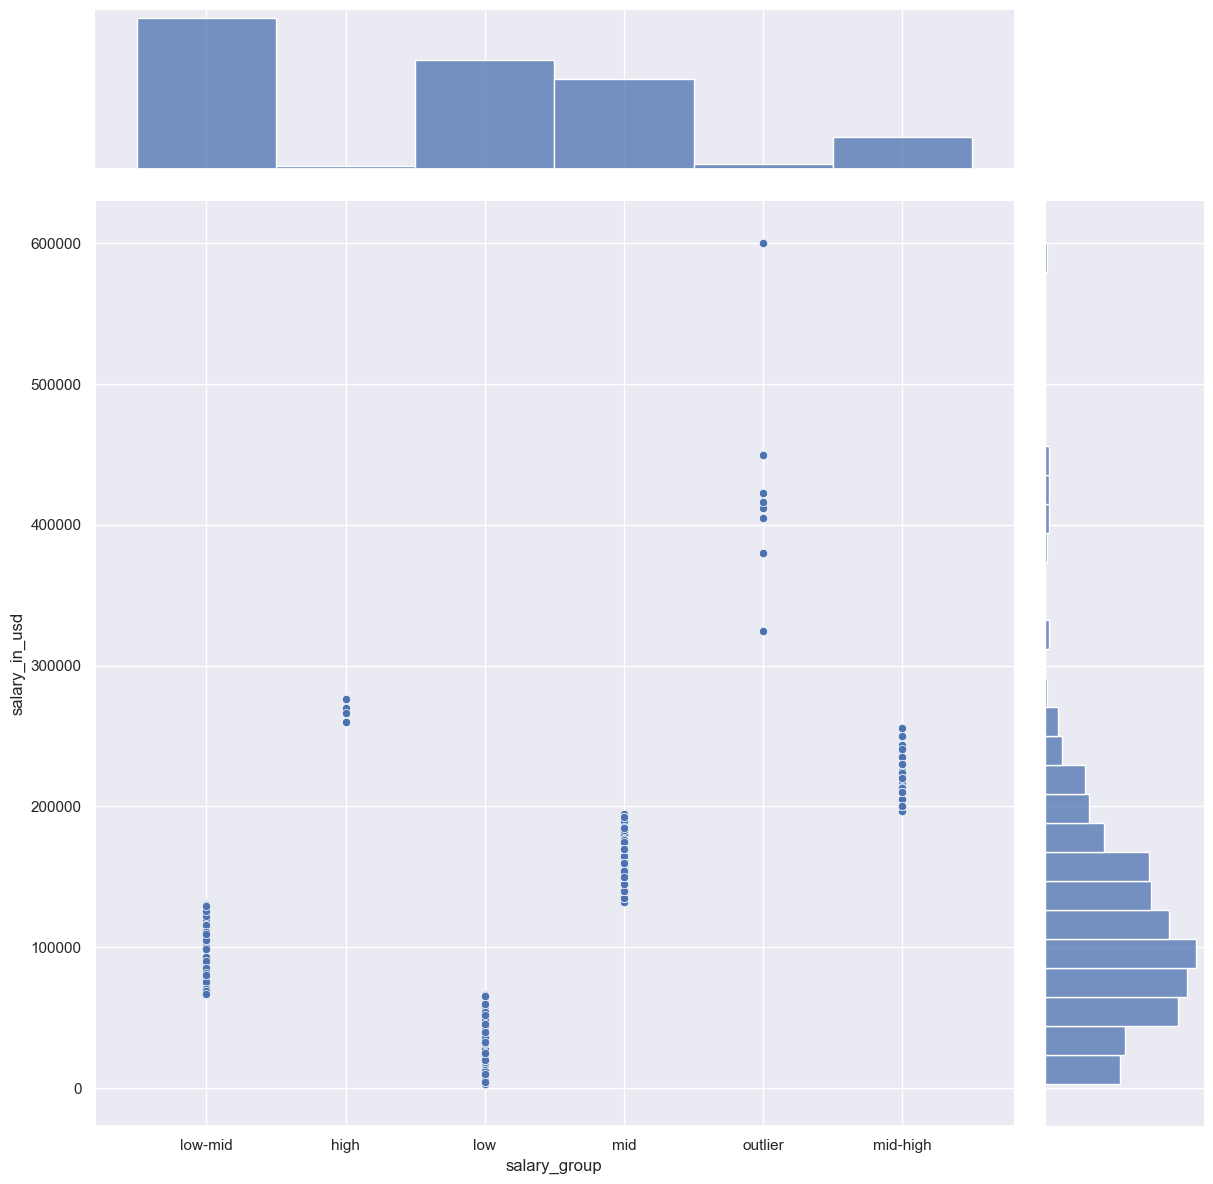

In [13]:
sb.jointplot(data = new_salary, x = "salary_group", y = "salary_in_usd", height = 12) # to do: sort them in order

In [14]:
dsdata["salary_group"] = new_salary["salary_group"]
dsdata.head()

,Index,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_group
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,low-mid
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,high
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,low-mid
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,low
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,mid


---

### Creating feature: Categorize `experience_level` by groups
- 5 different categories created 
    1. 0 ( Entry Level )
    2. 1 ( Junior MI Mid Level )
    3. 2 ( Intermediate SE Senior-level )
    4. 3 ( Expert EX Executive-level )
    5. 4 ( Director )

#### Explore `experience_level` category based on the salary

In [15]:
dsdata['experience_level'].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

Experience Level : 4
SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64


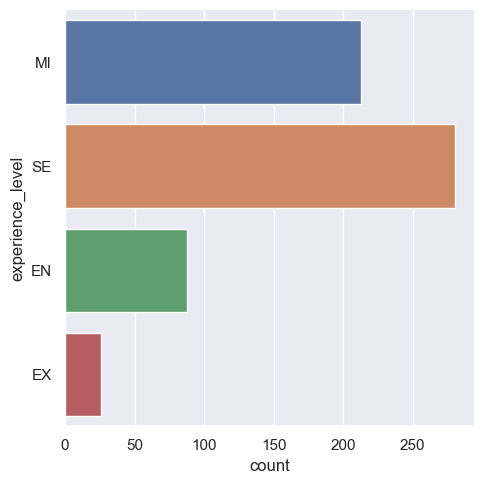

In [16]:
# Visualize Experience Level
print("Experience Level :", len(dsdata['experience_level'].unique()))
print(dsdata['experience_level'].value_counts())
sb.catplot(y = "experience_level", data = dsdata, kind = "count")
plt.show()

In [17]:
dsdata['experience_levelN'] = dsdata['experience_level'].map( {'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3} ).astype(int)

experience_level = pd.DataFrame(dsdata['experience_level'])
dsdata.head()

,Index,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_group,experience_levelN
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,low-mid,1
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,high,2
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,low-mid,2
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,low,1
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,mid,2


Experience Level : 4
SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64


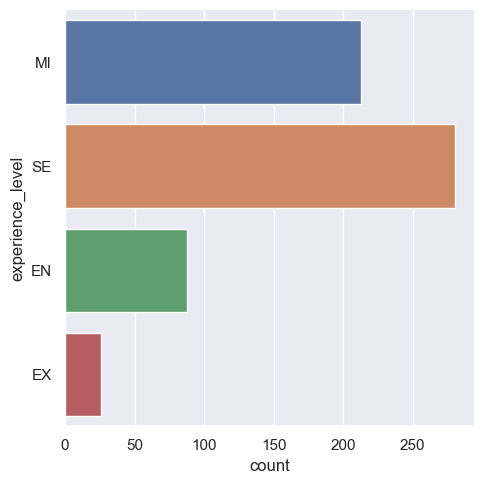

In [18]:
# Visualize Experience Level
print("Experience Level :", len(dsdata['experience_level'].unique()))
print(dsdata['experience_level'].value_counts())
sb.catplot(y = "experience_level", data = dsdata, kind = "count")
plt.show()

---

### Creating feature: Categorize `company_size` by groups
- 3 different categories created 
    1. 0 - S less than 50 employees (small) 
    2. 1 - M 50 to 250 employees (medium) 
    3. 2 - L more than 250 employees (large)

#### Explore the `company_size` level category based on the salary

In [19]:
dsdata['company_size'].unique()

array(['L', 'S', 'M'], dtype=object)

Company Size: 3
M    326
L    198
S     83
Name: company_size, dtype: int64


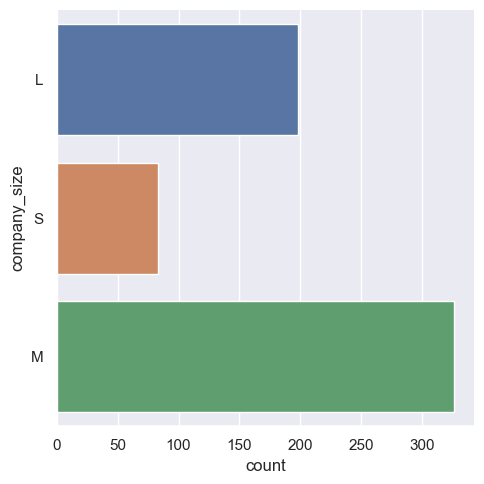

In [20]:
# Visualize Company Size
print("Company Size:", len(dsdata['company_size'].unique()))
print(dsdata['company_size'].value_counts())
sb.catplot(y = "company_size", data = dsdata, kind = "count")
plt.show()

In [21]:
dsdata['company_sizeN'] = dsdata['company_size'].map( {'S': 0, 'M': 1, 'L': 2} ).astype(int)
dsdata.head()

# creating a new dataframe for company size only (in case we need it)
company_size = pd.DataFrame(dsdata['company_size'])

Company Size: 3
M    326
L    198
S     83
Name: company_size, dtype: int64


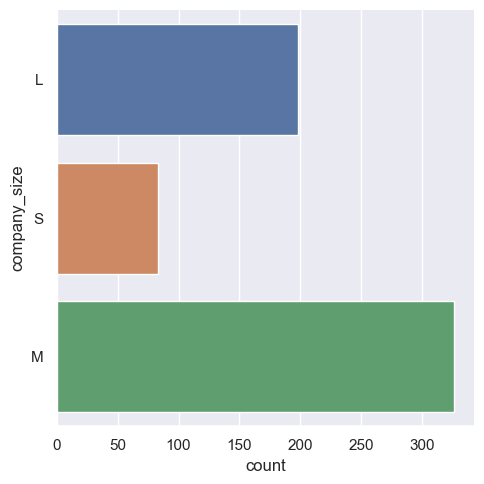

In [22]:
# Visualize Company Size
print("Company Size:", len(dsdata['company_size'].unique()))
print(dsdata['company_size'].value_counts())
sb.catplot(y = "company_size", data = dsdata, kind = "count")
plt.show()

---

### Creating feature: Categorize `employment_type` by groups
- 4 different categories created 
    1. 0 - PT Part-time 
    2. 1 - FT Full-time 
    3. 2 - CT Contract 
    4. 3 - FL Freelance

#### Explore the `employment_type` level category based on the salary

In [23]:
dsdata['employment_type'].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

Employement Type: 4
FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64


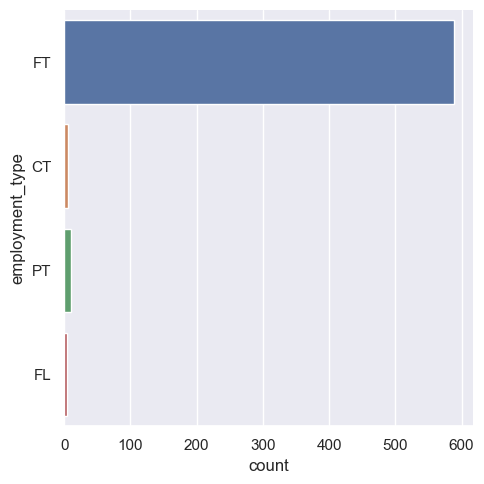

In [24]:
# Visualize Employment Type
print("Employement Type:", len(dsdata['employment_type'].unique()))
print(dsdata['employment_type'].value_counts())
sb.catplot(y = "employment_type", data = dsdata, kind = "count")
plt.show()

In [25]:
dsdata['employment_typeN'] = dsdata['employment_type'].map( {'PT': 0, 'FT': 1, 'CT': 2, 'FL': 3} ).astype(int)

# creating a new dataframe for company size only (in case we need it)
employement_type = pd.DataFrame(dsdata['employment_type'])
dsdata.head()

,Index,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_group,experience_levelN,company_sizeN,employment_typeN
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,low-mid,1,2,1
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,high,2,0,1
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,low-mid,2,1,1
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,low,1,0,1
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,mid,2,2,1


Employement Type: 4
FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64


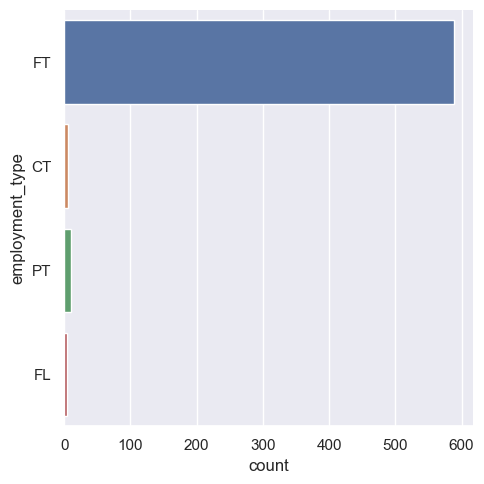

In [26]:
# Visualize Experience Level
print("Employement Type:", len(dsdata['employment_type'].unique()))
print(dsdata['employment_type'].value_counts())
sb.catplot(y = "employment_type", data = dsdata, kind = "count")
plt.show()

---

#### Creating feature: Split `company_location` and `employee_residence` to continent level and group them categorically as `company_continent` & `employee_continent`

- `company_continent` will represent the continent the company reside in
- `employee_continent` will represent the continent of the employee working for the company

In [27]:
dsdata['company_continent'] = dsdata['company_location'].apply(lambda x: 'AFRICA' if x in ['NG','KE','DZ']
                                                      else ('ASIA' if x in ['JP', 'IN', 'PK', 'CN', 'AE', 'SG', 'IQ', 'IL', 'IR', 'VN', 'MY']
                                                      else ('AUSTRALIA' if x in ['NZ' ,'AU']
                                                      else ('EUROPE' if x in ['DE', 'GB', 'HU',	'FR', 'GR',	'NL', 'AT', 'ES', 'PT',	'DK', 'IT', 'HR', 'LU', 'RO', 'BE',	'UA', 'RU', 'MT',	'MD', 'SI',	'CH',	'TR',	'CZ',	'EE',	'IE']
                                                      else ('NORTH AMERICA' if x in ['HN', 'US', 'MX', 'CA', 'AS']
                                                      else ('SOUTH AMERICA' ))))))

dsdata.head()

,Index,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_group,experience_levelN,company_sizeN,employment_typeN,company_continent
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,low-mid,1,2,1,EUROPE
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,high,2,0,1,ASIA
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,low-mid,2,1,1,EUROPE
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,low,1,0,1,NORTH AMERICA
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,mid,2,2,1,NORTH AMERICA


In [28]:
dsdata['employee_continent'] = dsdata['employee_residence'].apply(lambda x: 'AFRICA' if x in ['NG','KE','DZ']
                                                      else ('ASIA' if x in ['JP', 'IN', 'PK', 'CN', 'AE', 'SG', 'IQ', 'IL', 'IR', 'VN', 'MY']
                                                      else ('AUSTRALIA' if x in ['NZ' ,'AU']
                                                      else ('EUROPE' if x in ['DE', 'GB', 'HU',	'FR', 'GR',	'NL', 'AT', 'ES', 'PT',	'DK', 'IT', 'HR', 'LU', 'RO', 'BE',	'UA', 'RU', 'MT',	'MD', 'SI',	'CH',	'TR',	'CZ',	'EE',	'IE']
                                                      else ('NORTH AMERICA' if x in ['HN', 'US', 'MX', 'CA', 'AS']
                                                      else ('SOUTH AMERICA' ))))))

dsdata.head()

,Index,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_group,experience_levelN,company_sizeN,employment_typeN,company_continent,employee_continent
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,low-mid,1,2,1,EUROPE,EUROPE
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,high,2,0,1,ASIA,ASIA
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,low-mid,2,1,1,EUROPE,EUROPE
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,low,1,0,1,NORTH AMERICA,NORTH AMERICA
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,mid,2,2,1,NORTH AMERICA,NORTH AMERICA


### Creating feature: Create a new feature that categorizes `job_title` into different positions 
- The position `Head` which contain data that has `Director` or `Lead` in its job title 
- `Manager` contains data that has `Manager` in its job title
- `Developer` contains data that has `Developer` in its job title
- `Anaylst` contains data that has `Analyst` or `Specialist` in its job title
- `Scientist` contains data that has `Scientist` or `Researcher` in its job title
- `Consultant` contains data that has `Consultant`
- `Engineer` contains data that has `Engineer` or `Architect` in its job title

In [29]:
def get_job_type(job_title):
    if 'Head' in job_title or 'Director' in job_title or 'Lead' in job_title:
        return 'Head'
    elif 'Manager' in job_title:
        return 'Manager'
    elif 'Developer' in job_title:
        return 'Developer'
    elif 'Analyst' in job_title or 'Specialist' in job_title:
        return 'Analyst'
    elif 'Scientist' in job_title or 'Researcher' in job_title:
        return 'Scientist'
    elif 'Consultant' in job_title:
        return 'Consultant'
    elif 'Engineer' in job_title or 'Architect' in job_title:
        return 'Engineer'
    else:
        return 'unknown'
    


dsdata['job_type'] = dsdata['job_title'].apply(get_job_type)

dsdata.head()

,Index,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_group,experience_levelN,company_sizeN,employment_typeN,company_continent,employee_continent,job_type
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,low-mid,1,2,1,EUROPE,EUROPE,Scientist
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,high,2,0,1,ASIA,ASIA,Scientist
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,low-mid,2,1,1,EUROPE,EUROPE,Engineer
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,low,1,0,1,NORTH AMERICA,NORTH AMERICA,Analyst
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,mid,2,2,1,NORTH AMERICA,NORTH AMERICA,Engineer


### Creating feature: Create a new feature that categorizes `job_title` into different domain 

- `Management` contains data that has `Manager`in its job title
- `Data Science` contains data that has `Data` or `ETL` in its job title
- `Computer Vision` contains data that has `Computer Vision` in its job title
- `AI` contains data that has `AI` in its job title
- `Machine Learning` contains data that has `ML` or `Machine Learning` in its job title
- `NLP` contains data that has `NLP` in its job title
- `Unknown` contains data that is not specific in its job title. i.e. `Research Scientist` , `Analytics Engineer`

In [30]:
def get_domain(job_title):
    if 'Manager' in job_title:
        return 'Management'
    elif 'Data' in job_title or 'ETL' in job_title:
        return 'Data science'
    elif 'Computer Vision' in job_title:
        return 'Computer Vision'
    elif 'AI' in job_title:
        return 'AI'
    elif 'Machine Learning' in job_title or 'ML' in job_title:
        return 'Machine Learning'
    elif 'NLP' in job_title:
        return 'NLP'
    
    else:
        return 'Unknown'
    

dsdata['domain'] = dsdata['job_title'].apply(get_domain)

dsdata.head()

,Index,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_group,experience_levelN,company_sizeN,employment_typeN,company_continent,employee_continent,job_type,domain
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,low-mid,1,2,1,EUROPE,EUROPE,Scientist,Data science
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,high,2,0,1,ASIA,ASIA,Scientist,Machine Learning
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,low-mid,2,1,1,EUROPE,EUROPE,Engineer,Data science
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,low,1,0,1,NORTH AMERICA,NORTH AMERICA,Analyst,Data science
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,mid,2,2,1,NORTH AMERICA,NORTH AMERICA,Engineer,Machine Learning


In [31]:
for index, row in dsdata.iterrows():
    if(row['domain'] == 'Unknown'):
        # print out the salary currency, salary_in_usd and company location for people with the job title as data scientist
        print(row['job_title'])

Research Scientist
Research Scientist
Research Scientist
Research Scientist
Research Scientist
Research Scientist
Research Scientist
Research Scientist
Research Scientist
Research Scientist
Research Scientist
Research Scientist
Analytics Engineer
Analytics Engineer
Research Scientist
Research Scientist
Research Scientist
Research Scientist
Analytics Engineer
Analytics Engineer


The remaining unknown `domains` are the job title that are not specific in the field of their work so we classified them as `Unknown`

The `Unknown` category will contain both `Research Scientist` and `Analytics Engineer` 

### Creating feature: Categorize `remote_ratio` by groups
- 3 different categories created 
    1. 0 - No remote work / less than 20%
    2. 1 - 50% Partially remote 
    3. 2 - 100% Fully remote (more than 80%)

#### Explore the `remote_ratio` level category based on the salary

In [32]:
dsdata['remote_ratio'].unique()

array([  0,  50, 100], dtype=int64)

Remote Ratio: 3
100    381
0      127
50      99
Name: remote_ratio, dtype: int64


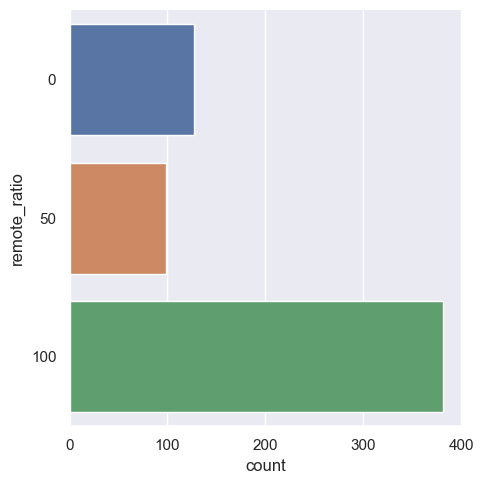

In [33]:
# Visualize Remote Ratio
print("Remote Ratio:", len(dsdata['remote_ratio'].unique()))
print(dsdata['remote_ratio'].value_counts())
sb.catplot(y = "remote_ratio", data = dsdata, kind = "count")
plt.show()

In [34]:
dsdata['remote_ratio'] = dsdata['remote_ratio'].map( {0: 0, 50: 1, 100: 2} ).astype(int)

# creating a new dataframe for company size only (in case we need it)
remote_ratio = pd.DataFrame(dsdata['remote_ratio'])
dsdata.head()

,Index,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_group,experience_levelN,company_sizeN,employment_typeN,company_continent,employee_continent,job_type,domain
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,low-mid,1,2,1,EUROPE,EUROPE,Scientist,Data science
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,high,2,0,1,ASIA,ASIA,Scientist,Machine Learning
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,1,GB,M,low-mid,2,1,1,EUROPE,EUROPE,Engineer,Data science
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,low,1,0,1,NORTH AMERICA,NORTH AMERICA,Analyst,Data science
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,1,US,L,mid,2,2,1,NORTH AMERICA,NORTH AMERICA,Engineer,Machine Learning


Remote Ratio: 3
2    381
0    127
1     99
Name: remote_ratio, dtype: int64


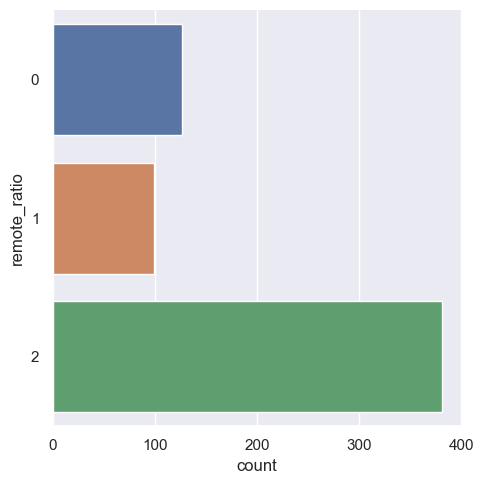

In [35]:
# Visualize Remote Ratio
print("Remote Ratio:", len(dsdata['remote_ratio'].unique()))
print(dsdata['remote_ratio'].value_counts())
sb.catplot(y = "remote_ratio", data = dsdata, kind = "count")
plt.show()

### Creating feature: Categorize `company_continent` & `employee_continent` into groups

- 6 different categories created 
    1. 0 : Europe
    2. 1 : Asia
    3. 2 : North America
    4. 3 : Australia
    5. 4 : South America
    6. 5 : Africa

In [36]:
dsdata['employee_continent'].unique()

array(['EUROPE', 'ASIA', 'NORTH AMERICA', 'AUSTRALIA', 'SOUTH AMERICA',
       'AFRICA'], dtype=object)

Employee Continent: 6
NORTH AMERICA    364
EUROPE           159
ASIA              55
SOUTH AMERICA     21
AUSTRALIA          4
AFRICA             4
Name: employee_continent, dtype: int64


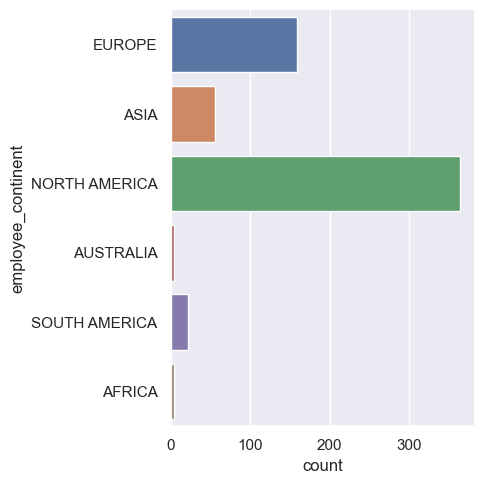

In [37]:
# Visualize Remote Ratio
print("Employee Continent:", len(dsdata['employee_continent'].unique()))
print(dsdata['employee_continent'].value_counts())
sb.catplot(y = "employee_continent", data = dsdata, kind = "count")
plt.show()

In [38]:
dsdata['employee_continentN'] = dsdata['employee_continent'].map( {'EUROPE': 0, 'ASIA': 1, 'NORTH AMERICA': 2, 'AUSTRALIA':3, 'SOUTH AMERICA':4, 'AFRICA': 5} ).astype(int)

dsdata.head()

,Index,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,...,company_size,salary_group,experience_levelN,company_sizeN,employment_typeN,company_continent,employee_continent,job_type,domain,employee_continentN
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,...,L,low-mid,1,2,1,EUROPE,EUROPE,Scientist,Data science,0
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,...,S,high,2,0,1,ASIA,ASIA,Scientist,Machine Learning,1
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,1,...,M,low-mid,2,1,1,EUROPE,EUROPE,Engineer,Data science,0
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,...,S,low,1,0,1,NORTH AMERICA,NORTH AMERICA,Analyst,Data science,2
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,1,...,L,mid,2,2,1,NORTH AMERICA,NORTH AMERICA,Engineer,Machine Learning,2


#### Transforming `company_continent` into numerical values

In [39]:
dsdata['company_continent'].unique()

array(['EUROPE', 'ASIA', 'NORTH AMERICA', 'AUSTRALIA', 'AFRICA',
       'SOUTH AMERICA'], dtype=object)

Company Continent: 6
NORTH AMERICA    390
EUROPE           156
ASIA              44
SOUTH AMERICA      9
AUSTRALIA          4
AFRICA             4
Name: company_continent, dtype: int64


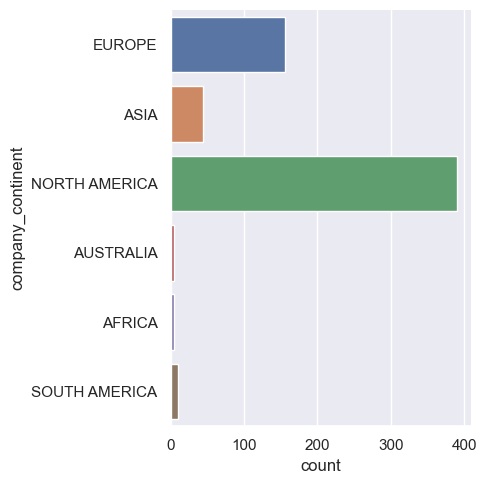

In [40]:
# Visualize Remote Ratio
print("Company Continent:", len(dsdata['company_continent'].unique()))
print(dsdata['company_continent'].value_counts())
sb.catplot(y = "company_continent", data = dsdata, kind = "count")
plt.show()

In [41]:
dsdata['company_continentN'] = dsdata['company_continent'].map( {'EUROPE': 0, 'ASIA': 1, 'NORTH AMERICA': 2, 'AUSTRALIA':3, 'SOUTH AMERICA':4, 'AFRICA': 5} ).astype(int)

dsdata.head()

,Index,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,...,salary_group,experience_levelN,company_sizeN,employment_typeN,company_continent,employee_continent,job_type,domain,employee_continentN,company_continentN
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,...,low-mid,1,2,1,EUROPE,EUROPE,Scientist,Data science,0,0
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,...,high,2,0,1,ASIA,ASIA,Scientist,Machine Learning,1,1
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,1,...,low-mid,2,1,1,EUROPE,EUROPE,Engineer,Data science,0,0
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,...,low,1,0,1,NORTH AMERICA,NORTH AMERICA,Analyst,Data science,2,2
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,1,...,mid,2,2,1,NORTH AMERICA,NORTH AMERICA,Engineer,Machine Learning,2,2


#### Dropping `Index` column because it will not be used in the model

In [42]:
dsdata = dsdata.drop(['Index'], axis=1)

### Export DS Salaries into a new dataset

In [43]:
import os
wd = os.getcwd()

wd = wd + '/new_ds_salaries.csv' 

In [44]:
dsdata.to_csv(wd, index=False)